In [49]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn import preprocessing
import pandas as pd
import seaborn as sb

Explicação do dataset titanic.xls

Pclass - Passenger Class (1 = primeira classe; 2 =  segunda classe; 3 = 3 classe)
survival - Sobevivente (0 = Não 1 = Sim)
name - Nome
sex - Sexo
sibsp - Mumero de Irmãos/ Cônjuges a bordo
parch - Número de pais/filhos a bordo
ticket - Número do Ticket
fare - Tarifa de Passageiro
cabin - Cabine
embarked - embarcou em qual porto (C = Cherbourg; Q = Queenstown; S = Southampton)
boat - Bote salva vidas
body - Nr de identificação do corpo
home.dest - Lar e Destino


Objetivo: Tentar prever com Kmeans a taxa de sobrevivência
Clusterizar dados com MeansShift

In [50]:
#carrega o data frame do titanic.xls
df = pd.read_excel('titanic.xls')

#faz uma copia do dataframe
original_df = pd.DataFrame.copy(df)

#dropamos as colunas body e name por acharmos que nao influenciam no resultado
df.drop(['body', 'name'], 1, inplace=True)
df.drop (['boat'], 1, inplace=True)

#permite conversão para numérico
df.convert_objects(convert_numeric=True)

#preenche com 0 campos vazios (saneamento)
df.fillna(0, inplace=True)

print (df.head())

   pclass  survived     sex      age  sibsp  parch  ticket      fare    cabin  \
0       1         1  female  29.0000      0      0   24160  211.3375       B5   
1       1         1    male   0.9167      1      2  113781  151.5500  C22 C26   
2       1         0  female   2.0000      1      2  113781  151.5500  C22 C26   
3       1         0    male  30.0000      1      2  113781  151.5500  C22 C26   
4       1         0  female  25.0000      1      2  113781  151.5500  C22 C26   

  embarked                        home.dest  
0        S                     St Louis, MO  
1        S  Montreal, PQ / Chesterville, ON  
2        S  Montreal, PQ / Chesterville, ON  
3        S  Montreal, PQ / Chesterville, ON  
4        S  Montreal, PQ / Chesterville, ON  


C:\Users\pc vaio\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':


      pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0          1         1    1  29.0000      0      0     739  211.3375    155   
1          1         1    0   0.9167      1      2     498  151.5500    109   
2          1         0    1   2.0000      1      2     498  151.5500    109   
3          1         0    0  30.0000      1      2     498  151.5500    109   
4          1         0    1  25.0000      1      2     498  151.5500    109   
5          1         1    0  48.0000      0      0     682   26.5500    158   
6          1         1    1  63.0000      1      0     534   77.9583     83   
7          1         0    0  39.0000      0      0     643    0.0000    121   
8          1         1    1  53.0000      2      0     685   51.4792    141   
9          1         0    0  71.0000      0      0      86   49.5042      0   
10         1         0    0  47.0000      1      0     839  227.5250     33   
11         1         1    1  18.0000      1      0  

C:\Users\pc vaio\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\pc vaio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pc vaio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\pc vaio\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    1  29.0000      0      0     739  211.3375    155   
1       1         1    0   0.9167      1      2     498  151.5500    109   
2       1         0    1   2.0000      1      2     498  151.5500    109   
3       1         0    0  30.0000      1      2     498  151.5500    109   
4       1         0    1  25.0000      1      2     498  151.5500    109   

   embarked  home.dest  
0         3        276  
1         3        110  
2         3        110  
3         3        110  
4         3        110  


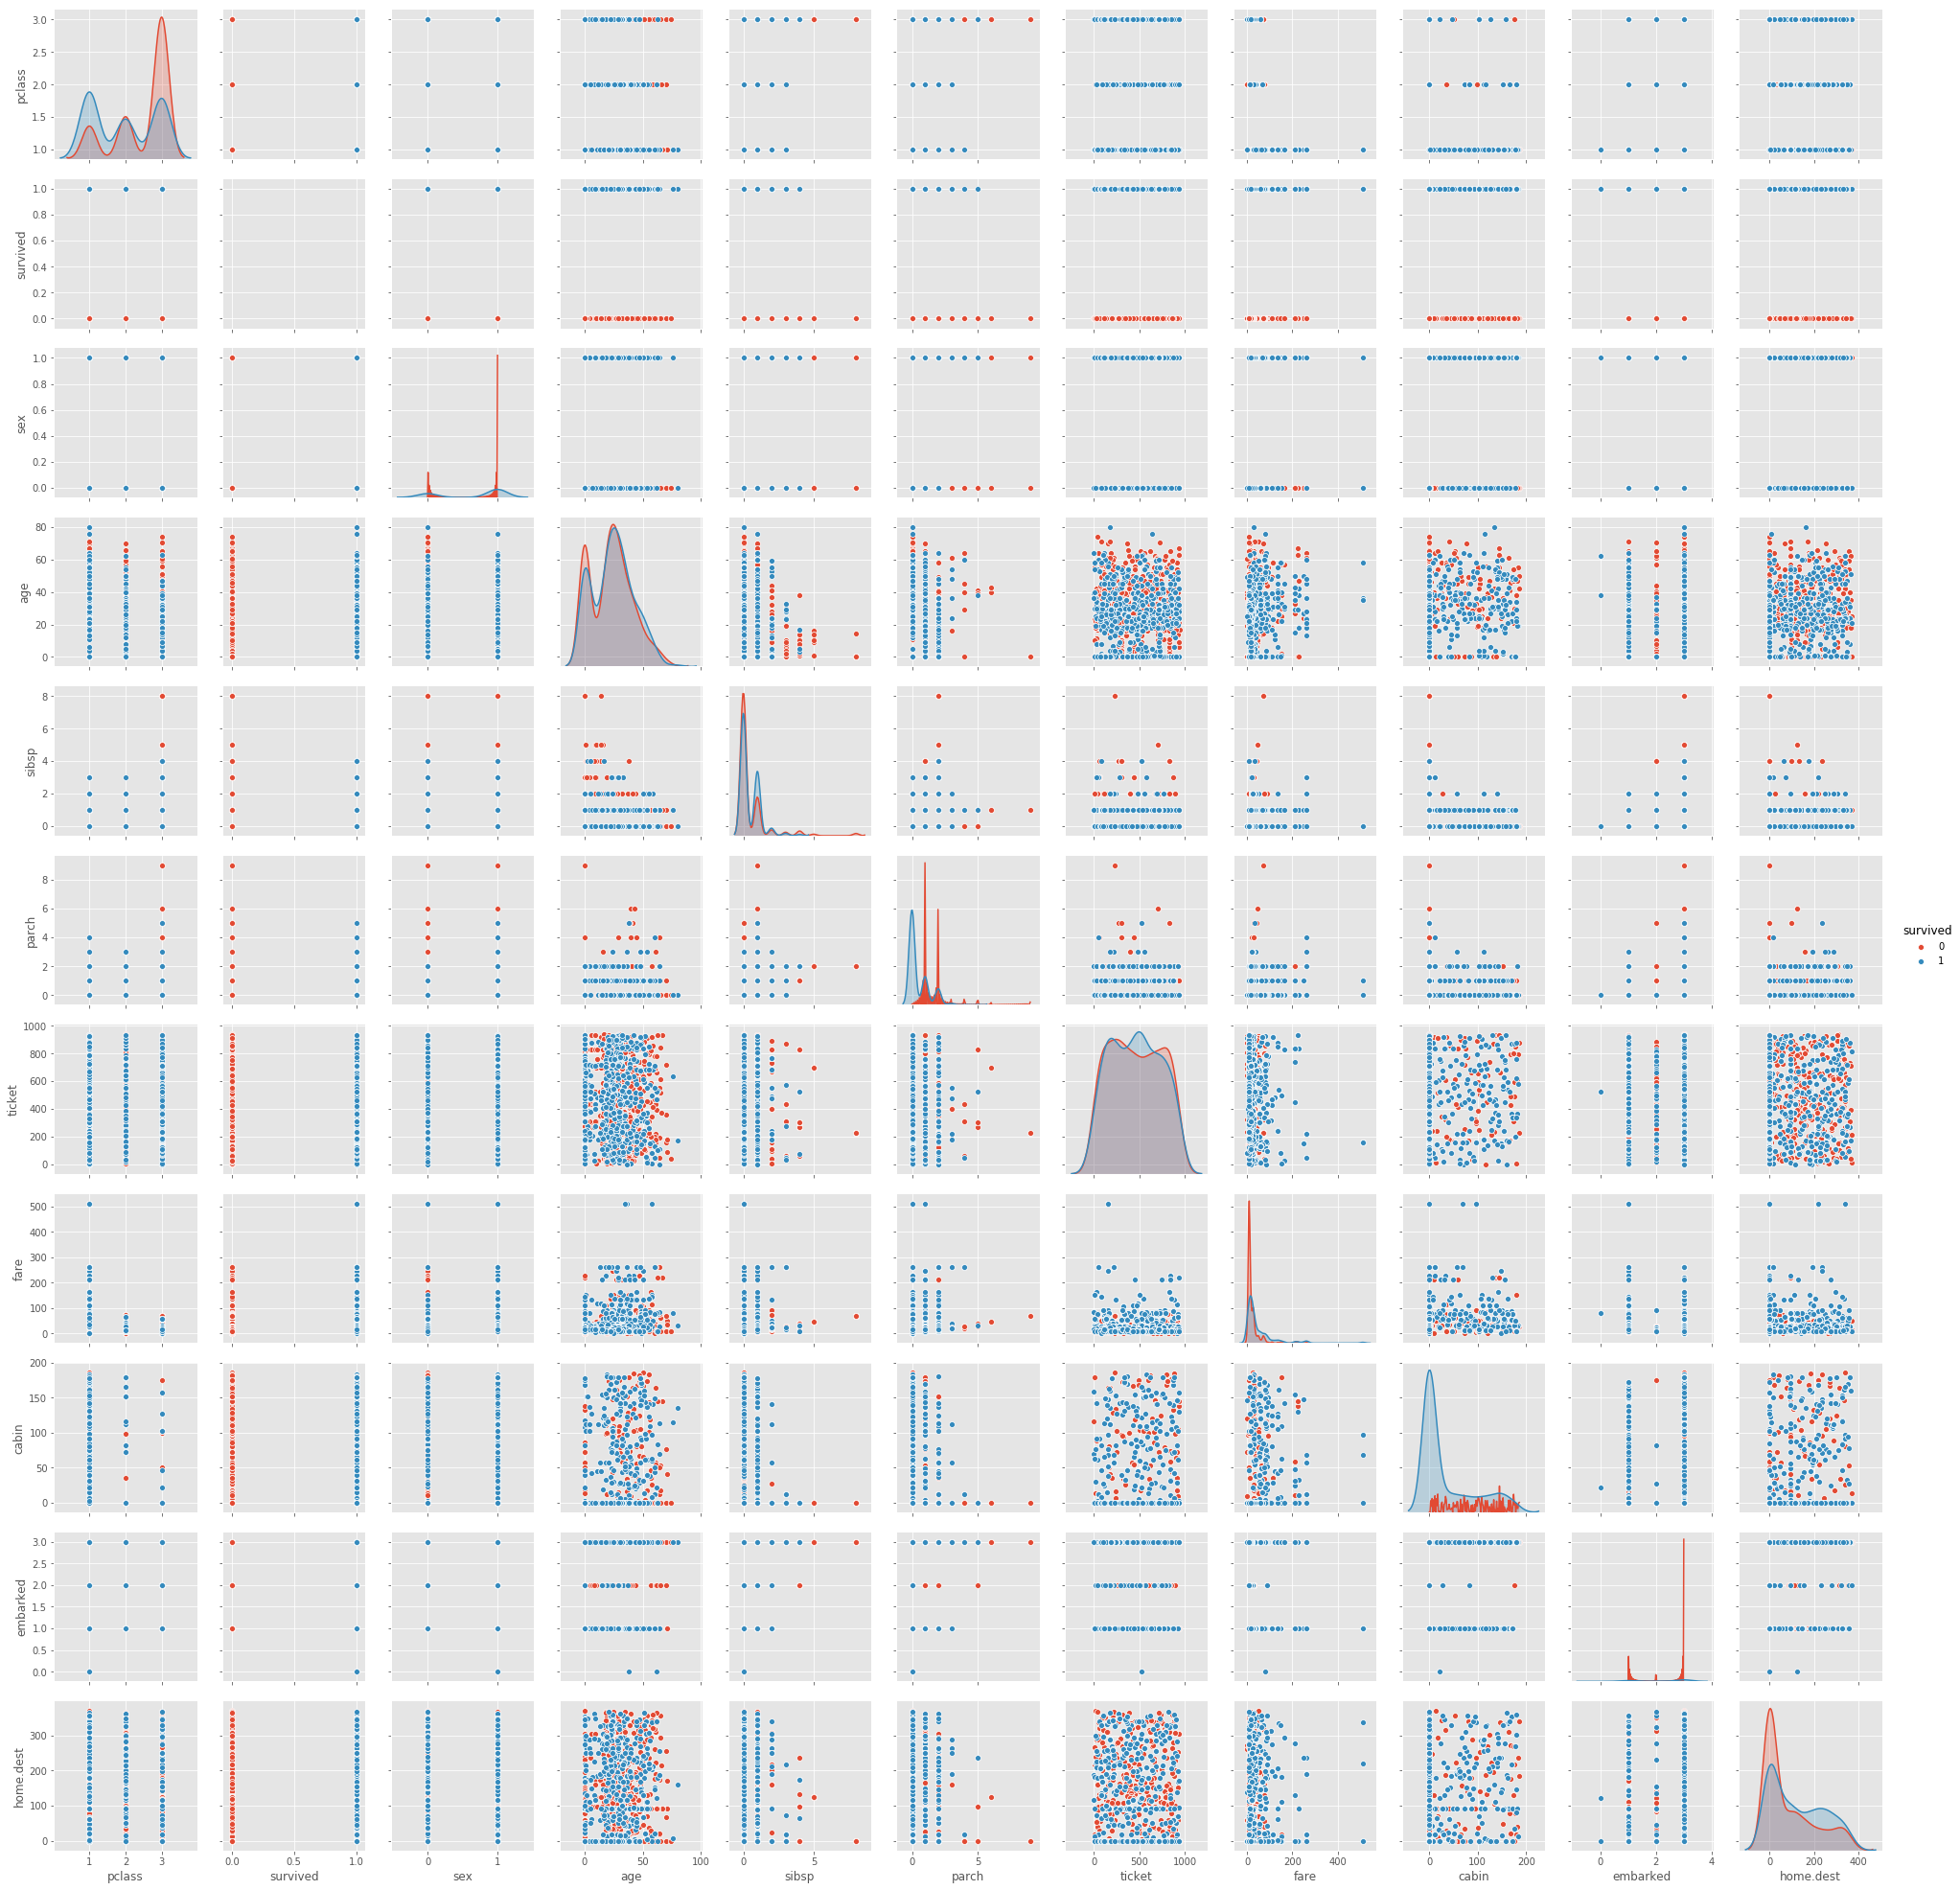

In [51]:
#definir funcao para converter o que nao e numerico em numerico
#definiu-se dessa maneira para que o KMeans pudesse clusterizar
def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
            
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            
            #converte coluna em inteiro
            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
#print no df
print(df)
#plota graficos
sb.pairplot(df,hue='survived')
#sb.pairplot(df)
print(df.head())

Taxa de acerto do KMeans
0.693659281894576
      pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0          1         1    1  29.0000      0      0     739  211.3375    155   
1          1         1    0   0.9167      1      2     498  151.5500    109   
2          1         0    1   2.0000      1      2     498  151.5500    109   
3          1         0    0  30.0000      1      2     498  151.5500    109   
4          1         0    1  25.0000      1      2     498  151.5500    109   
5          1         1    0  48.0000      0      0     682   26.5500    158   
6          1         1    1  63.0000      1      0     534   77.9583     83   
7          1         0    0  39.0000      0      0     643    0.0000    121   
8          1         1    1  53.0000      2      0     685   51.4792    141   
9          1         0    0  71.0000      0      0      86   49.5042      0   
10         1         0    0  47.0000      1      0     839  227.5250     33   
11       

C:\Users\pc vaio\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\pc vaio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pc vaio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\pc vaio\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


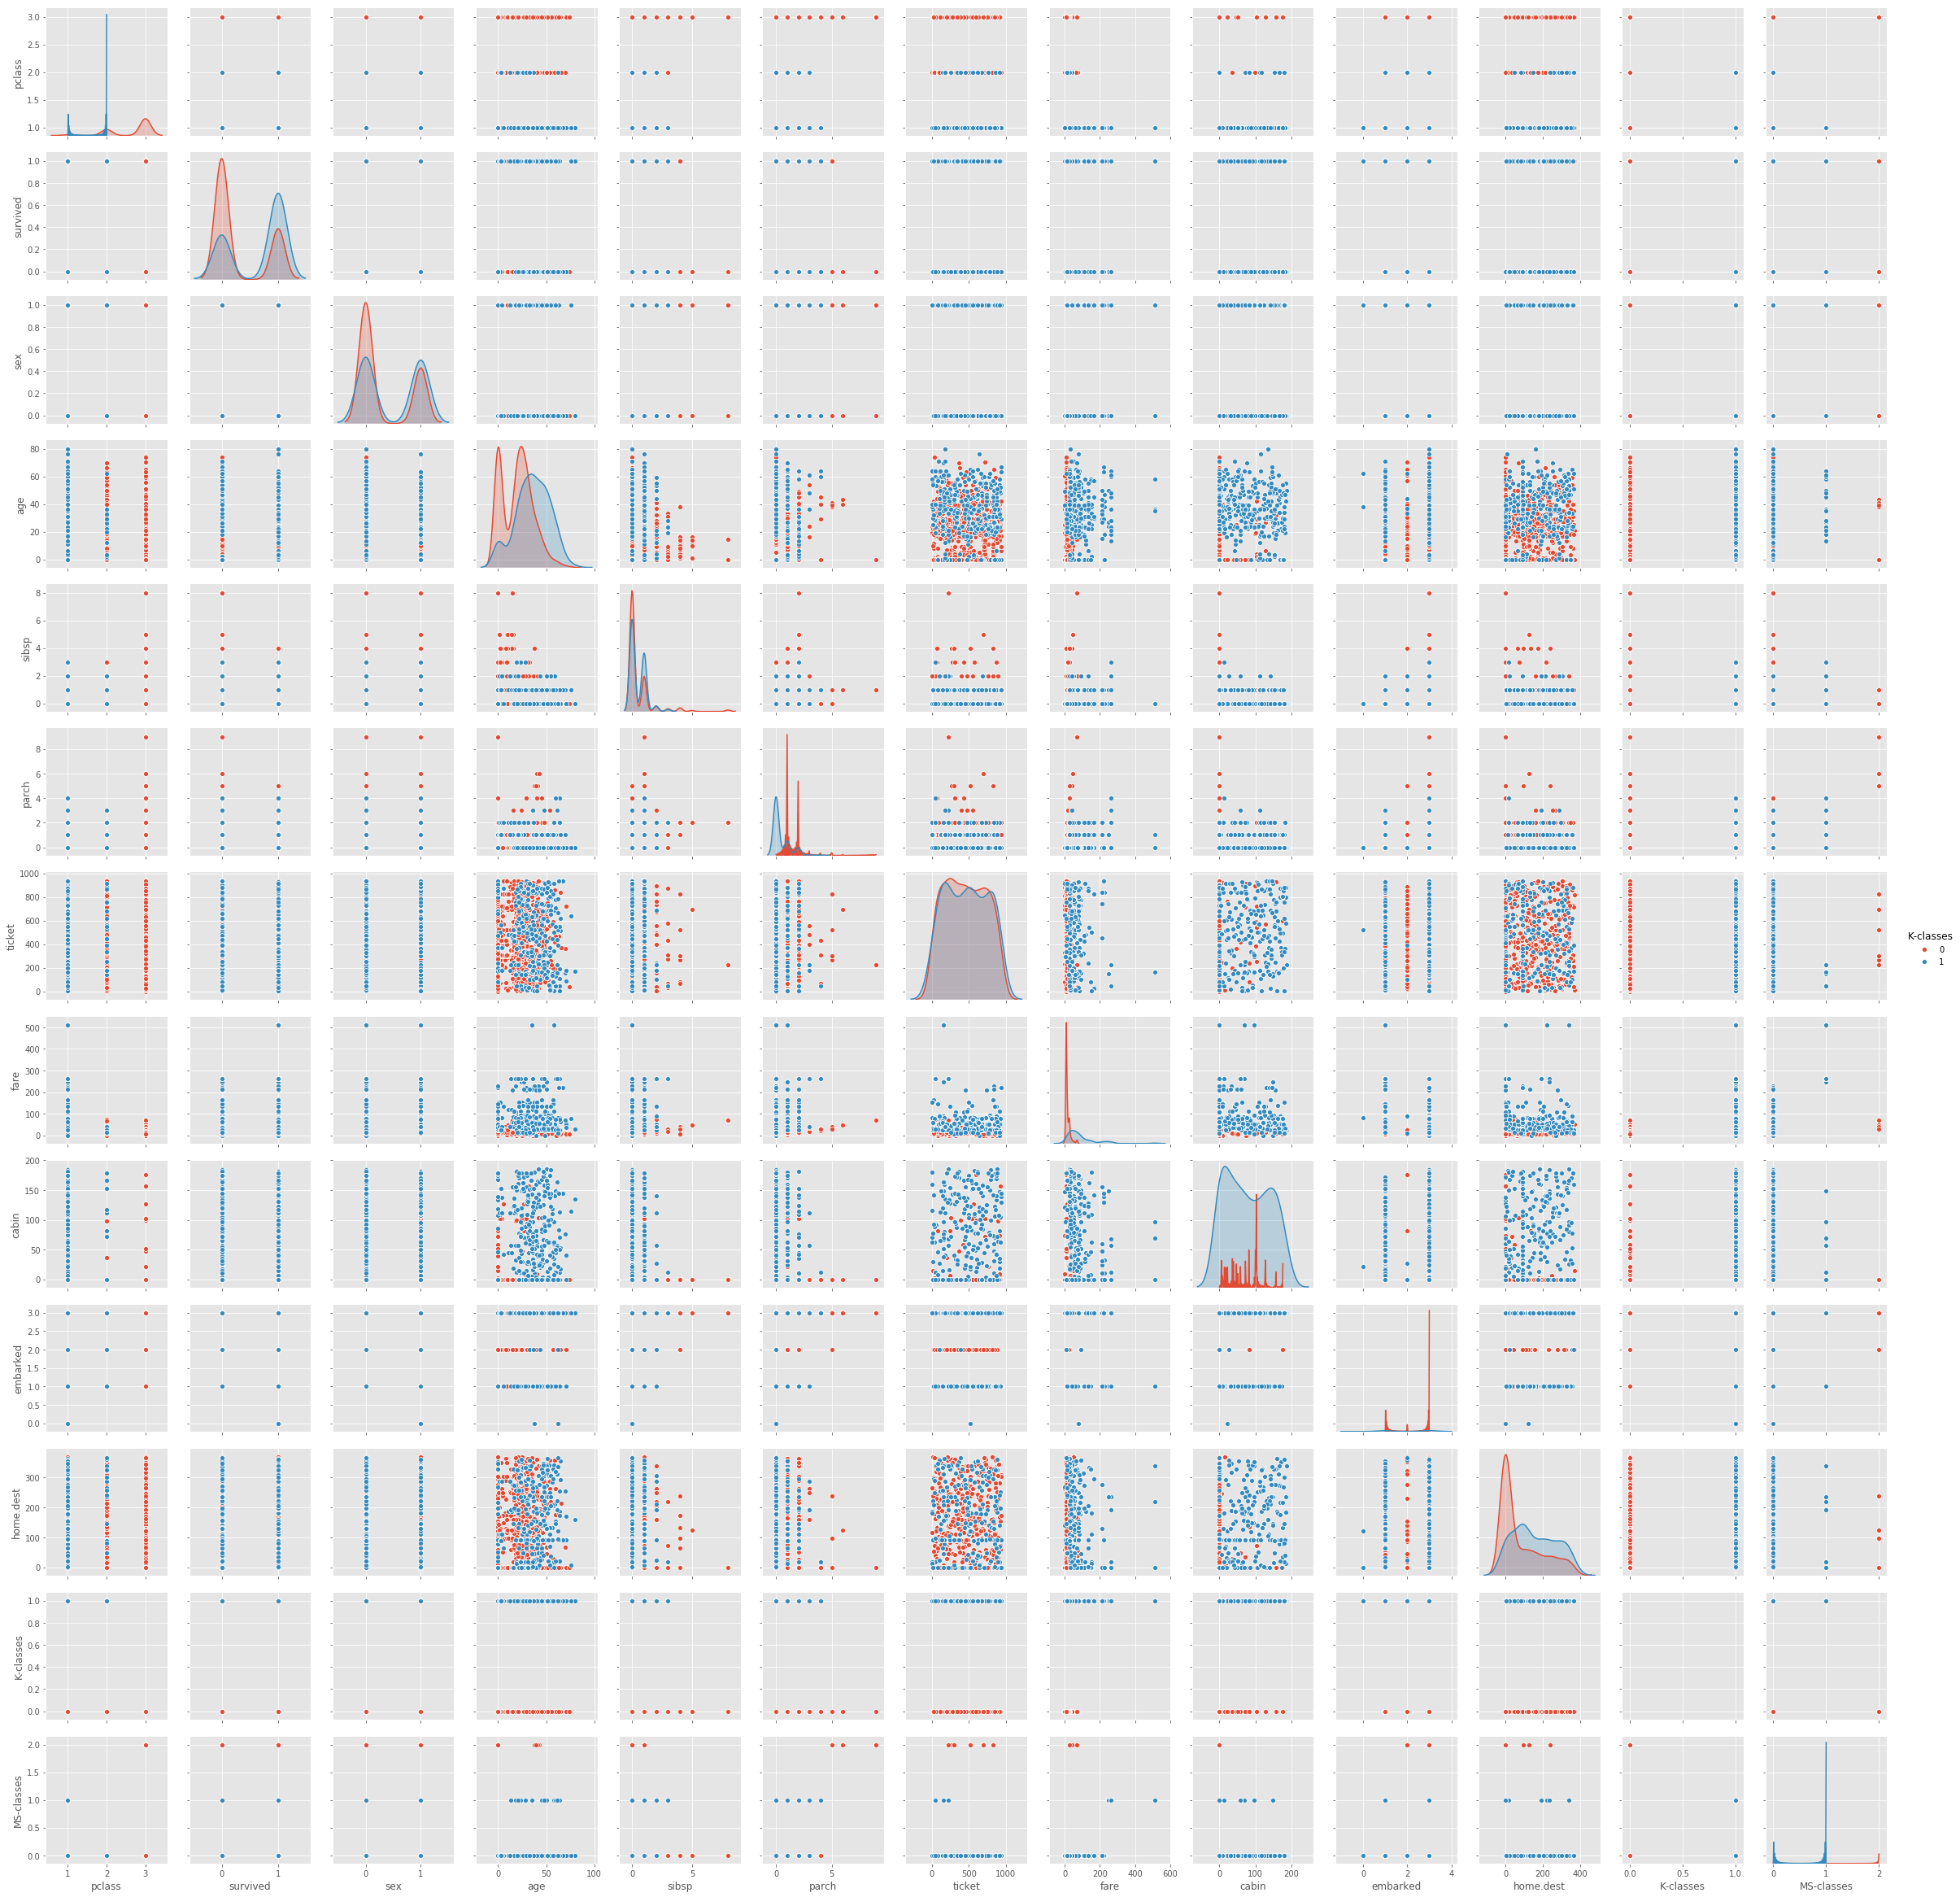

In [47]:
#carrega x sem a informacao de quem sobreviveu
x = np.array(df.drop(['survived'], 1).astype(float))
#aumentar a acuracia
x = preprocessing.scale(x) 
#carrega y com dados de quem sobreviveu
y = np.array(df['survived'])

#carrega clf com 2 clusters
clf = KMeans(n_clusters=2)
clf.fit(x)

#insere a coluna de resultado do Kmeans no df principal 
df['K-classes'] = clf.labels_


#carrega clf_meanshift com tecnica MeanShift
clf_meanshift = MeanShift()
clf_meanshift.fit(x)

#insere a coluna de resultado do meanshift no df principal 
df['MS-classes'] = clfmeanshift.labels_



#tenta predizer x
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print("Taxa de acerto do KMeans")
print(correct/len(x))

#imprime df com kameans incluido
print(df)
#imprime o grafico com base no resultado Kmenas
sb.pairplot(df,hue='K-classes')


C:\Users\pc vaio\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


TAXA DE SOBREVIVENCIA POR CRUGOS CLUSTERIZADOS
{0: 0.3776387802971071, 1: 0.8, 2: 0.1}
##################################################

Grupo 0
      pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                                Anderson, Mr. Harry   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
7          1         0                             Andrews, Mr. Thomas Jr   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                            Artagaveytia, Mr. Ramon   
10    

       pclass  survived  age  sibsp  parch  fare  body  cluster_group
count     0.0       0.0  0.0    0.0    0.0   0.0   0.0            0.0
mean      NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
std       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
min       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
25%       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
50%       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
75%       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
max       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
##################################################

Medianas do Grupo Cluster 0 - Primeira Classe
##################################################

Medianas do Grupo Cluster 0 - Segunda Classe
##################################################

Medianas do Grupo Cluster 0 - Terceira Classe


C:\Users\pc vaio\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\pc vaio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pc vaio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\pc vaio\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


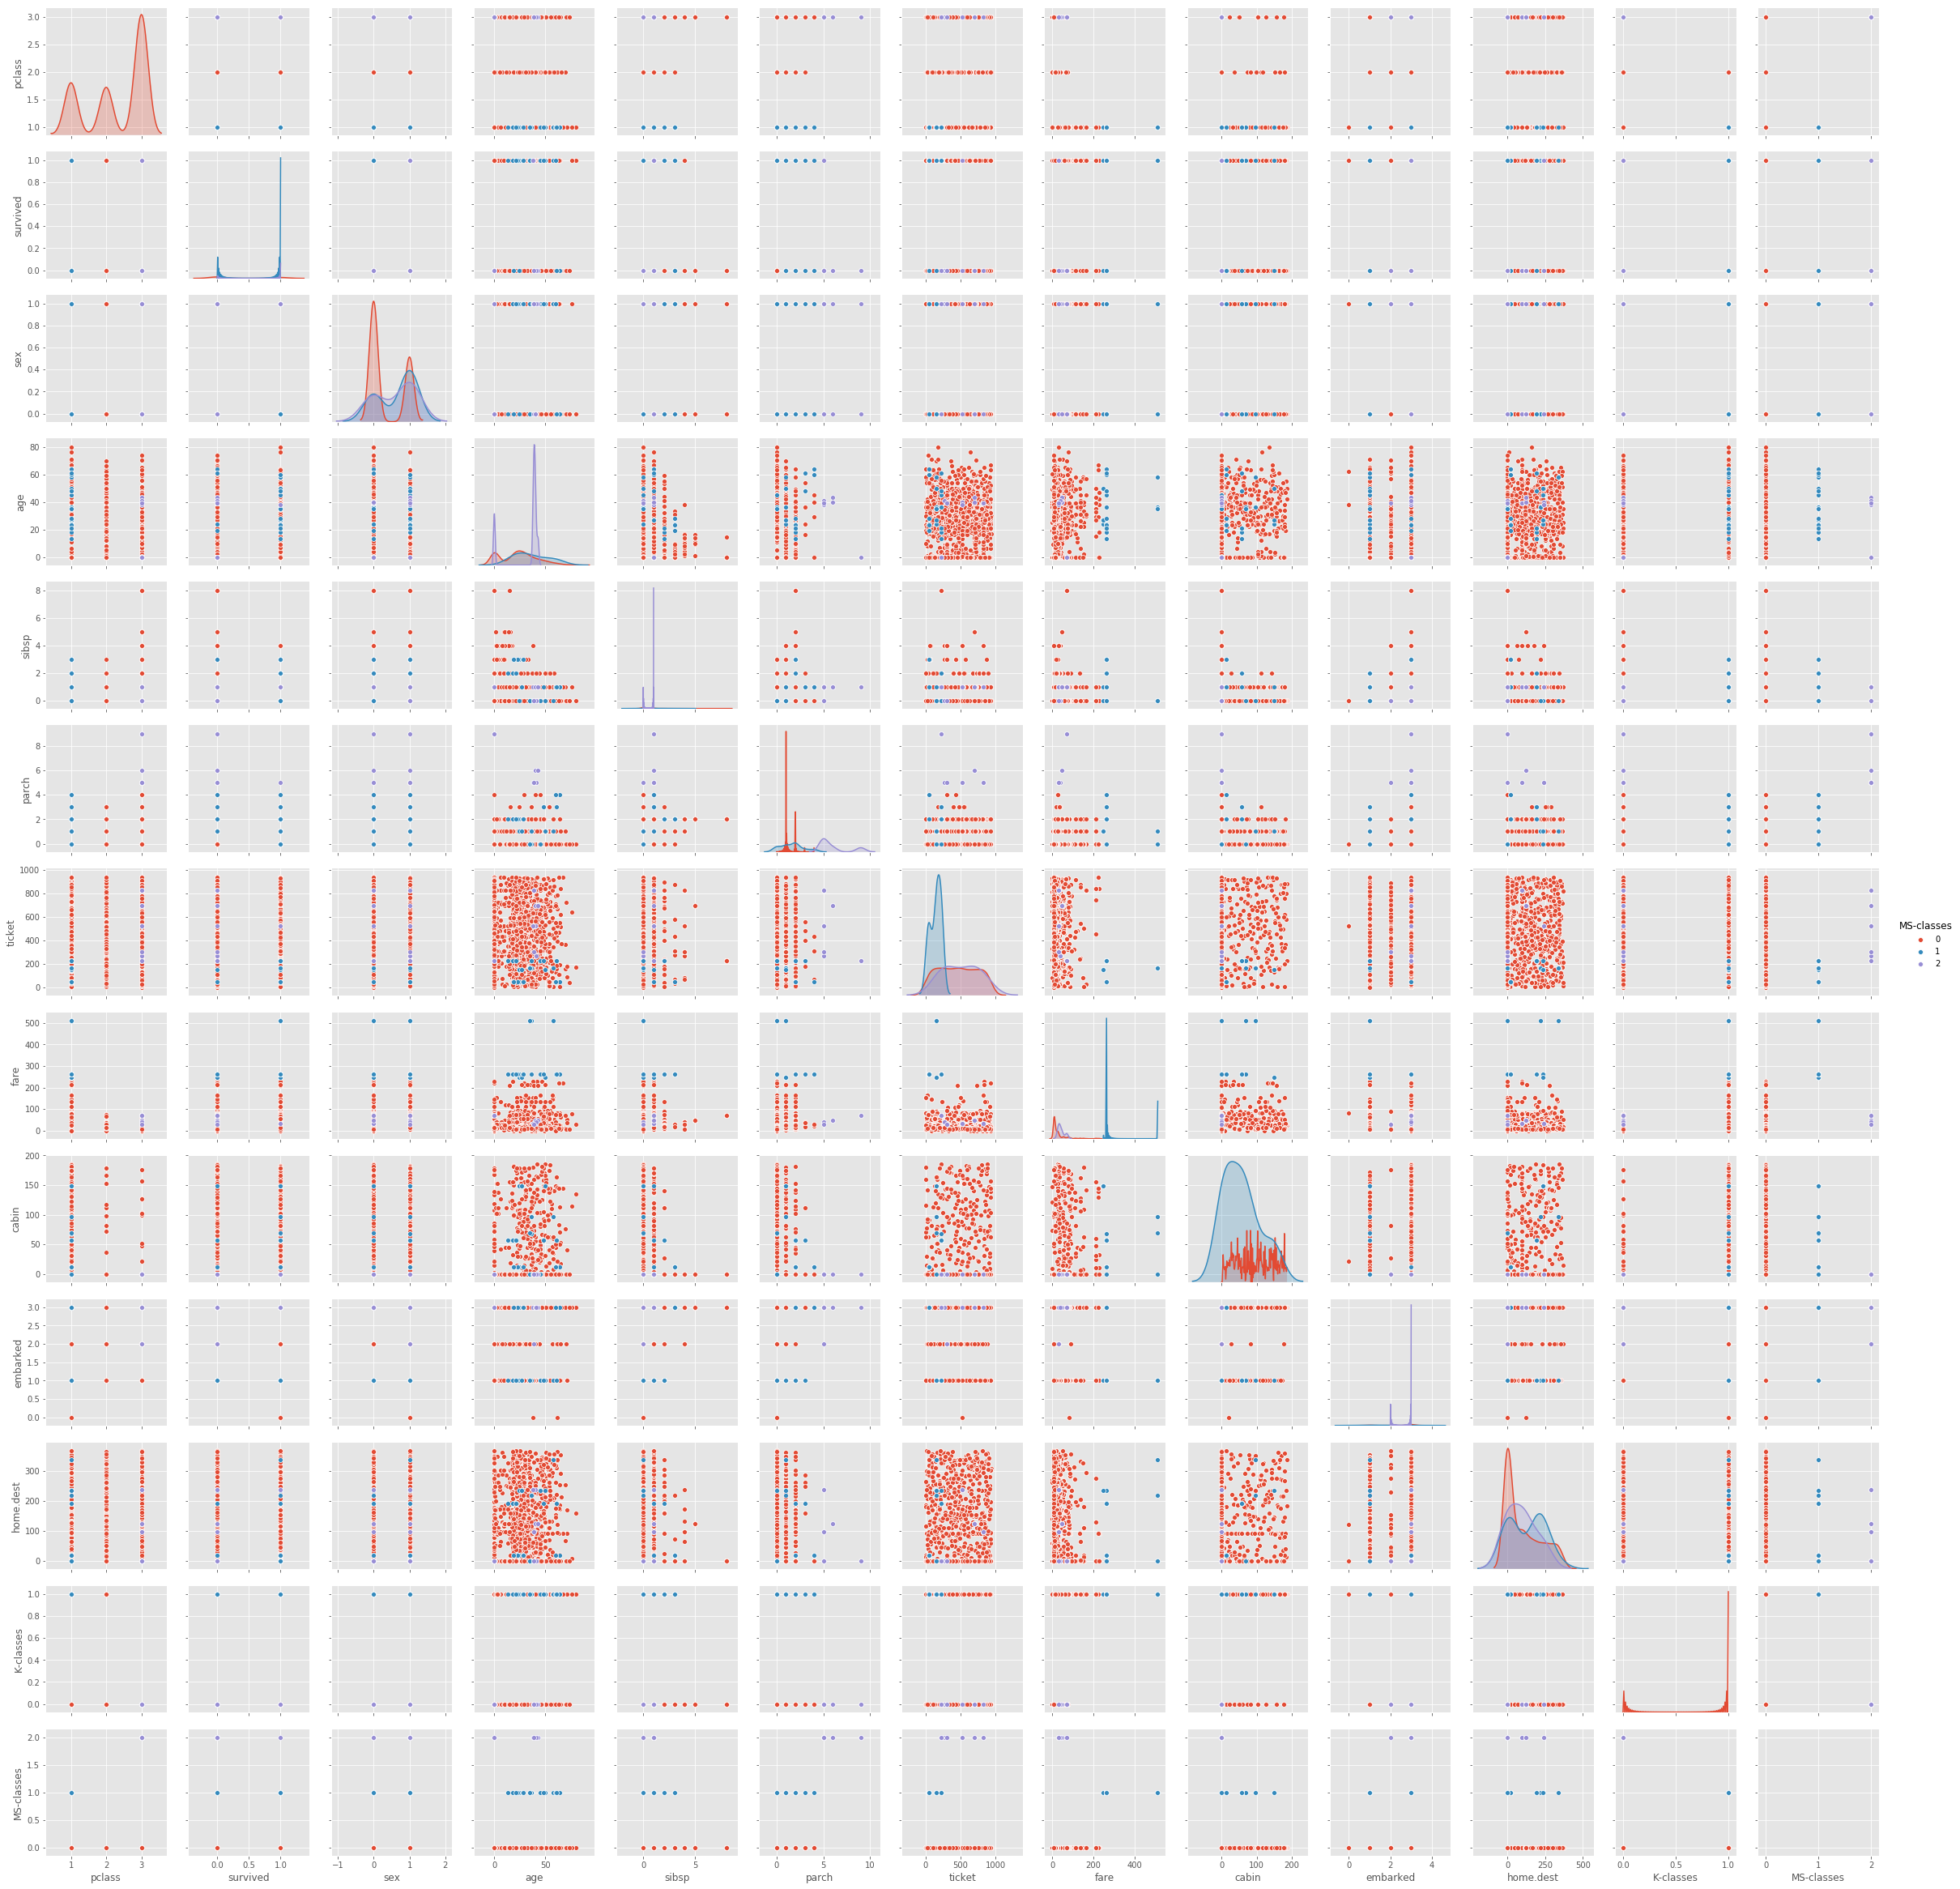

In [48]:
#continuacao MeanShift
#cria lista com os labels
labels = clf_meanshift.labels_
#cria lista com os centro de cluster
cluster_centers = clf_meanshift.cluster_centers_

#preenche dados vazios com NaN
original_df['cluster_group'] = np.nan


#percorre linhas
for i in range(len(x)):
    original_df['cluster_group'].iloc[i] = labels[i]

#nr de clusters de acordo com labels únicos
n_clusters_ = len(np.unique(labels))

#cria lista de taxa de sobrevivencia
survival_rates = {}
#percorre clusters
for i in range(n_clusters_):
    #dataframe temporario recebe 
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    survival_cluster = temp_df[ (temp_df['survived']==1) ]
    survival_rate = len(survival_cluster)/len(temp_df)
    survival_rates[i] = survival_rate

print("TAXA DE SOBREVIVENCIA POR CRUGOS CLUSTERIZADOS")
print (survival_rates)
print("##################################################")
print("")
print("Grupo 0")
print (original_df[ (original_df['cluster_group'] == 0) ])
print (original_df[ (original_df['cluster_group'] == 0) ].describe())
print("##################################################")
print("")
print("Grupo 1")
print (original_df[ (original_df['cluster_group'] == 1) ].describe())
print("##################################################")
print("")
print("Grupo 2")
print (original_df[ (original_df['cluster_group'] == 2) ].describe())
print("##################################################")
print("")
print("Grupo 3")
print (original_df[ (original_df['cluster_group'] == 3) ].describe())
print("##################################################")
print("")
print("Medianas do Grupo Cluster 0 - Primeira Classe")
cluster_0 = original_df[ (original_df['cluster_group'] == 0) ]
cluster_0_firstclass = cluster_0[ (cluster_0['pclass']==1) ]
cluster_0_firstclass.mean()
print("##################################################")
print("")
print("Medianas do Grupo Cluster 0 - Segunda Classe")
cluster_0 = original_df[ (original_df['cluster_group'] == 0) ]
cluster_0_firstclass = cluster_0[ (cluster_0['pclass']==2) ]
cluster_0_firstclass.mean()
print("##################################################")
print("")
print("Medianas do Grupo Cluster 0 - Terceira Classe")
cluster_0 = original_df[ (original_df['cluster_group'] == 0) ]
cluster_0_firstclass = cluster_0[ (cluster_0['pclass']==3) ]
cluster_0_firstclass.mean()


sb.pairplot(df,hue='MS-classes')    